In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [4]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'
df = pd.read_csv(url, encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
no_uk = df[df.Country != 'United Kingdom']
no_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583.0,France
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583.0,France


In [10]:
top10 = no_uk.groupby('Country').agg({
    'Quantity': 'sum'
}).sort_values('Quantity', ascending=False).head(10)
top10

,Quantity
Country,
Netherlands,200128
EIRE,142637
Germany,117448
France,110480
Australia,83653
Sweden,35637
Switzerland,30325
Spain,26824
Japan,25218


<Axes: xlabel='Country'>

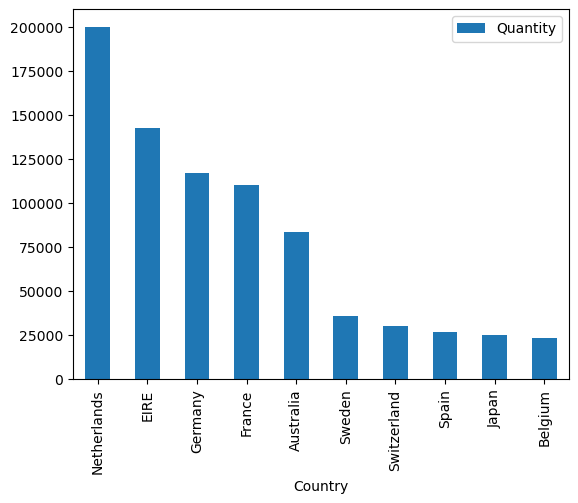

In [14]:
top10.plot(kind='bar')

In [15]:
non_neg = df[df.Quantity >= 0]
non_neg.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [68]:
customers = online_rt.groupby(['CustomerID','Country'])[['Quantity', 'UnitPrice']].sum()
customers.head(), customers.shape

(                           Quantity  UnitPrice
 CustomerID Country                            
 12346.0    United Kingdom         0       2.08
 12347.0    Iceland             2458     481.21
 12348.0    Finland             2341     178.71
 12349.0    Italy                631     605.10
 12350.0    Norway               197      65.30,
 (4380, 2))

In [69]:
customers = customers[customers.UnitPrice > 0]
customers.shape

(4379, 2)

In [48]:
customers.sort_values('UnitPrice', ascending=False)

,,Quantity,UnitPrice,Country
CustomerID,Country,,,
14096.0,United Kingdom,16335,41376.33,United Kingdom
15098.0,United Kingdom,60,40278.90,United Kingdom
14911.0,EIRE,77180,31060.66,EIRE
12744.0,Singapore,5234,25108.89,Singapore
16029.0,United Kingdom,32148,24111.14,United Kingdom
...,...,...,...,...
17752.0,United Kingdom,192,0.42,United Kingdom
13366.0,United Kingdom,144,0.39,United Kingdom
12875.0,United Kingdom,2019,0.34,United Kingdom


In [57]:
top3 = ['Netherlands', 'EIRE', 'Germany']
customers = customers[customers.Country.isin(top3)]
customers.shape

(107, 3)

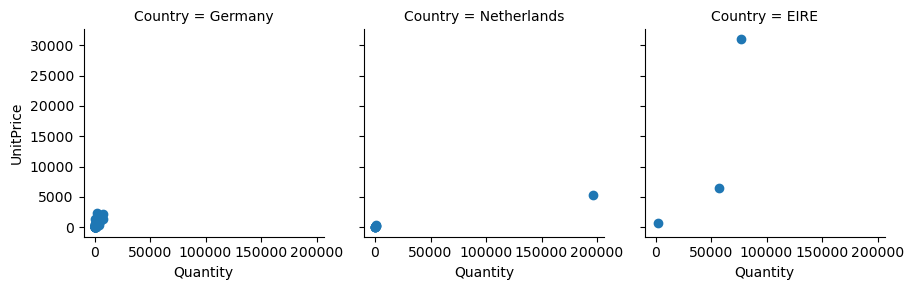

In [58]:
g = sns.FacetGrid(customers, col='Country')
g.map(plt.scatter, 'Quantity', 'UnitPrice', alpha=1)
g.add_legend()

In [59]:
customers.head()

,,Quantity,UnitPrice,Country
CustomerID,Country,,,
12426.0,Germany,258,118.09,Germany
12427.0,Germany,236,161.17,Germany
12468.0,Germany,364,139.07,Germany
12471.0,Germany,7965,2266.87,Germany
12472.0,Germany,4020,970.12,Germany


In [62]:
df[df.CustomerID.isin([12346.0, 12347.0])].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/10 14:57,2.10,12347.0,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/10 14:57,4.25,12347.0,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/10 14:57,3.25,12347.0,Iceland
14941,537626,22492,MINI PAINT SET VINTAGE,36,12/7/10 14:57,0.65,12347.0,Iceland
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,12/7/10 14:57,1.25,12347.0,Iceland


In [63]:
df = df[df.Quantity > 0]

In [65]:
df.groupby('Country').agg({
    'Quantity': 'sum'
}).sort_values('Quantity', ascending=False).head()

,Quantity
Country,
United Kingdom,4733819
Netherlands,200937
EIRE,147447
Germany,119263
France,112104


In [70]:
sales_volume = df.groupby('Country').Quantity.sum().sort_values(ascending=False)
sales_volume

Country
United Kingdom          4733819
Netherlands              200937
EIRE                     147447
Germany                  119263
France                   112104
Australia                 84209
Sweden                    36083
Switzerland               30630
Spain                     27951
Japan                     26016
Belgium                   23237
Norway                    19338
Portugal                  16258
Finland                   10704
Channel Islands            9491
Denmark                    8235
Italy                      8112
Cyprus                     6361
Singapore                  5241
Austria                    4881
Hong Kong                  4773
Israel                     4409
Poland                     3684
Unspecified                3300
Canada                     2763
USA                        2458
Iceland                    2458
Greece                     1557
United Arab Emirates        982
Malta                       970
Czech Republic              671


In [71]:
top3 = sales_volume.index[1:4]
top3

Index(['Netherlands', 'EIRE', 'Germany'], dtype='object', name='Country')

In [82]:
df['Revenue'] = df.Quantity*df.UnitPrice
df.head()

C:\Users\serge\AppData\Local\Temp\ipykernel_35176\3761070793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue'] = df.Quantity*df.UnitPrice


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34,20.34


In [84]:
gb = df[df.Country.isin(top3)].groupby(['CustomerID', 'Country'])

s = gb[['Quantity', 'Revenue']].agg('sum')
s['AvgPrice'] = s.Revenue / s.Quantity

s['Country'] = s.index.get_level_values(1)
s.head()

,,Quantity,Revenue,AvgPrice,Country
CustomerID,Country,,,,
12426.0,Germany,258,582.73,2.258643,Germany
12427.0,Germany,533,825.80,1.549343,Germany
12468.0,Germany,366,729.54,1.993279,Germany
12471.0,Germany,8212,19824.05,2.414034,Germany
12472.0,Germany,4148,6572.11,1.584405,Germany


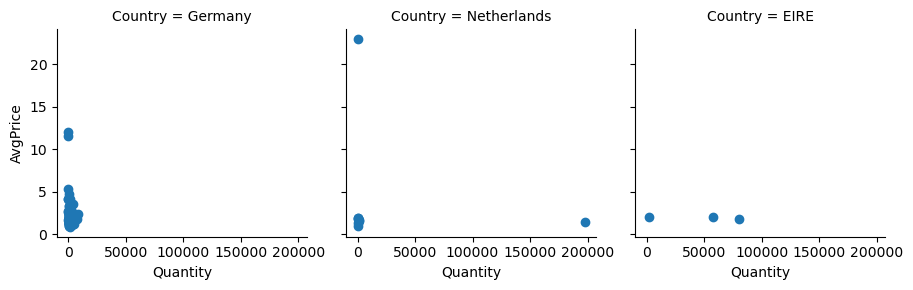

In [85]:
g = sns.FacetGrid(s, col='Country')
g.map(plt.scatter, 'Quantity', 'AvgPrice', alpha=1)
g.add_legend()

[]

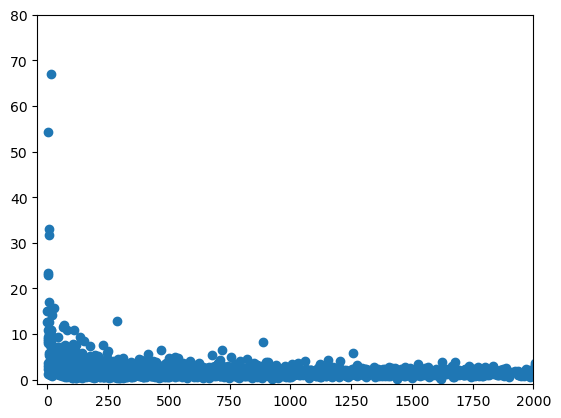

In [91]:
gb = df.groupby(['CustomerID', 'Country'])
s = gb[['Quantity', 'Revenue']].agg('sum')
s['AvgPrice'] = s.Revenue / s.Quantity

plt.scatter(s.Quantity, s.AvgPrice)
plt.xlim(-40, 2000)
plt.ylim(-1,80)

plt.plot()

In [99]:
price_start = 0
price_end = 50
price_interval = 1

buckets = np.arange(price_start, price_end, price_interval)
print(buckets)

cut = pd.cut(df.UnitPrice, buckets)
print(cut.head())

revenue_per_price = df.groupby(cut).Revenue.sum()
revenue_per_price

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
0    (2, 3]
1    (3, 4]
2    (2, 3]
3    (3, 4]
4    (3, 4]
Name: UnitPrice, dtype: category
Categories (49, interval[int64, right]): [(0, 1] < (1, 2] < (2, 3] < (3, 4] ... (45, 46] < (46, 47] < (47, 48] < (48, 49]]


UnitPrice
(0, 1]      1107774.544
(1, 2]      2691765.110
(2, 3]      2024143.090
(3, 4]       865101.780
(4, 5]      1219377.050
(5, 6]       391001.440
(6, 7]       268922.630
(7, 8]       306205.230
(8, 9]       380043.780
(9, 10]      163837.730
(10, 11]     238086.810
(11, 12]      25263.810
(12, 13]     201834.290
(13, 14]      10601.790
(14, 15]      74428.790
(15, 16]      21168.790
(16, 17]      83848.440
(17, 18]      36664.180
(18, 19]        728.190
(19, 20]      17771.430
(20, 21]      21066.670
(21, 22]       2990.410
(22, 23]         23.000
(23, 24]         23.530
(24, 25]      42633.490
(25, 26]      12006.290
(26, 27]        134.180
(27, 28]       8904.000
(28, 29]         28.660
(29, 30]       8258.540
(30, 31]          0.000
(31, 32]          0.000
(32, 33]       2942.410
(33, 34]       5186.970
(34, 35]       9399.530
(35, 36]       2870.200
(36, 37]        181.590
(37, 38]         74.960
(38, 39]         38.260
(39, 40]      20749.790
(40, 41]         80.920
(41, 4

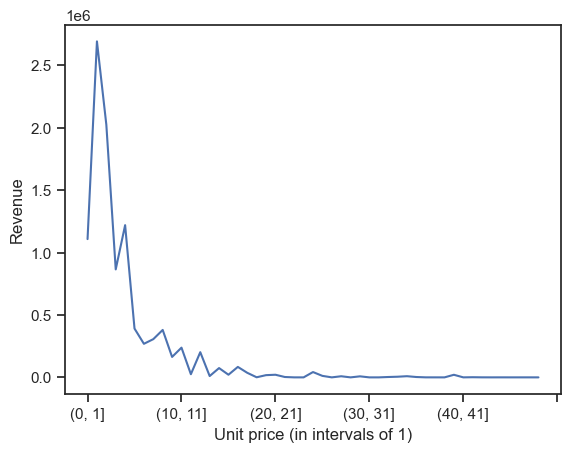

In [101]:
revenue_per_price.plot()
plt.xlabel('Unit price (in intervals of '+str(price_interval)+')')
plt.ylabel('Revenue')
plt.show()

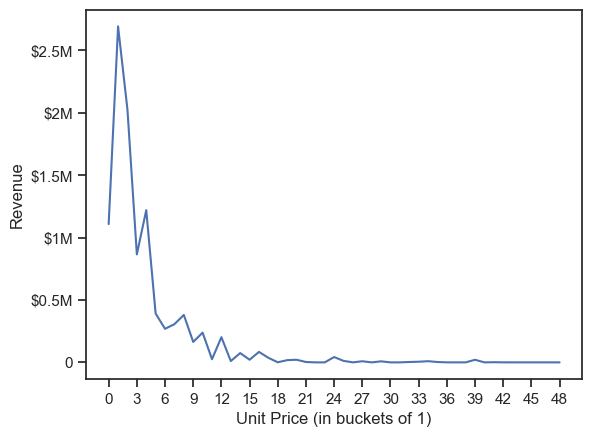

In [102]:
revenue_per_price.plot()

plt.xlabel('Unit Price (in buckets of '+str(price_interval)+')')
plt.ylabel('Revenue')

plt.xticks(np.arange(price_start,price_end,3),
          np.arange(price_start, price_end, 3))
plt.yticks([0,500000, 1000000, 1500000, 2000000, 2500000],
          ['0','$0.5M', '$1M', '$1.5M', '$2M', '$2.5M'])
plt.show()